## UCI Adult income dataset - Exploratory and Descriptive Analysis

This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the UCI Adult Income Dataset.

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

## Define and Create paths

In [4]:
# Get working directory
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
#define paths to the data folders
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# Define paths to results folder
result_dir = os.path.join(project_root_dir,'results')
# Define paths to docs folder
docs_dir = os.path.join(project_root_dir,'docs')

# create directories if they do not exist
os.makedirs(raw_dir,exist_ok= True)
os.makedirs(processed_dir,exist_ok= True)
os.makedirs(result_dir,exist_ok= True)
os.makedirs(docs_dir,exist_ok= True)

## Read in the data

In [6]:
adult_data_filename = os.path.join(processed_dir,"adult_cleaned.csv")
adult_df= pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## Check the shape of the dataset and datatypes

In [8]:
adult_df.shape

(32513, 16)

In [9]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnlwgt              32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary statistics
#### Numerical Variables

In [11]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Categorical Variables

In [13]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [14]:
adult_df["marital_status"].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [15]:
adult_df["relationship"].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [16]:
adult_df["workclass"].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [17]:
adult_df["race"].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

In [18]:
adult_df["native_region"].value_counts(normalize=True)

native_region
north america      0.923261
asia               0.020638
other              0.017870
central america    0.016117
europe             0.016024
south america      0.006090
Name: proportion, dtype: float64

## Income distribution

In [20]:
adult_df_income = adult_df.groupby("income").size().reset_index(name="total")
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


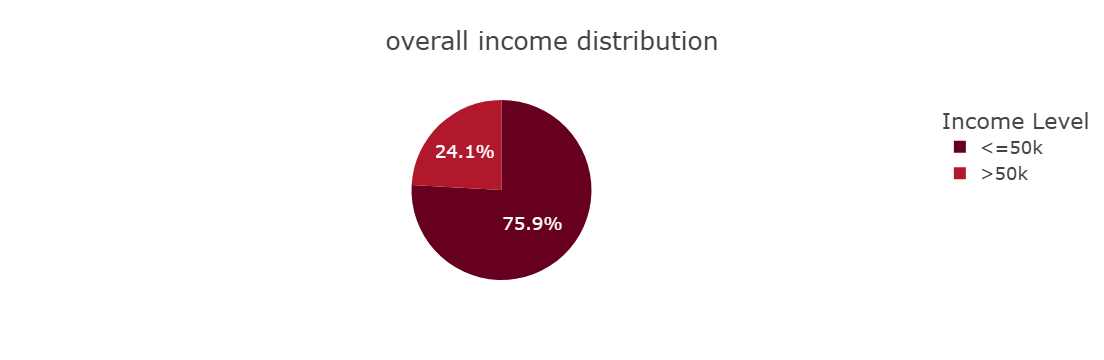

In [116]:
fig = px.pie(adult_df_income, names="income",
             values="total", 
             title= "overall income distribution", 
             color_discrete_sequence=px.colors.sequential.RdBu
            )
fig.update_layout(template = "presentation",
                  legend_title=dict(text="Income Level"),
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )

fig.show()
fig.write_image(os.path.join(result_dir, 'Income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Income_distribution_pie_chart.png'))
fig.write_html(os.path.join(result_dir, 'Income_distribution_pie_chart.html'))

## Income by Age Group

In [23]:
adult_df_income_age = adult_df.groupby(["age_group","income"]).size().reset_index(name="total_by_age").sort_values(["age_group","income"])
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [24]:
total_per_group = adult_df_income_age.groupby("age_group")["total_by_age"].transform("sum")
adult_df_income_age["percentage"]=(adult_df_income_age["total_by_age"]/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


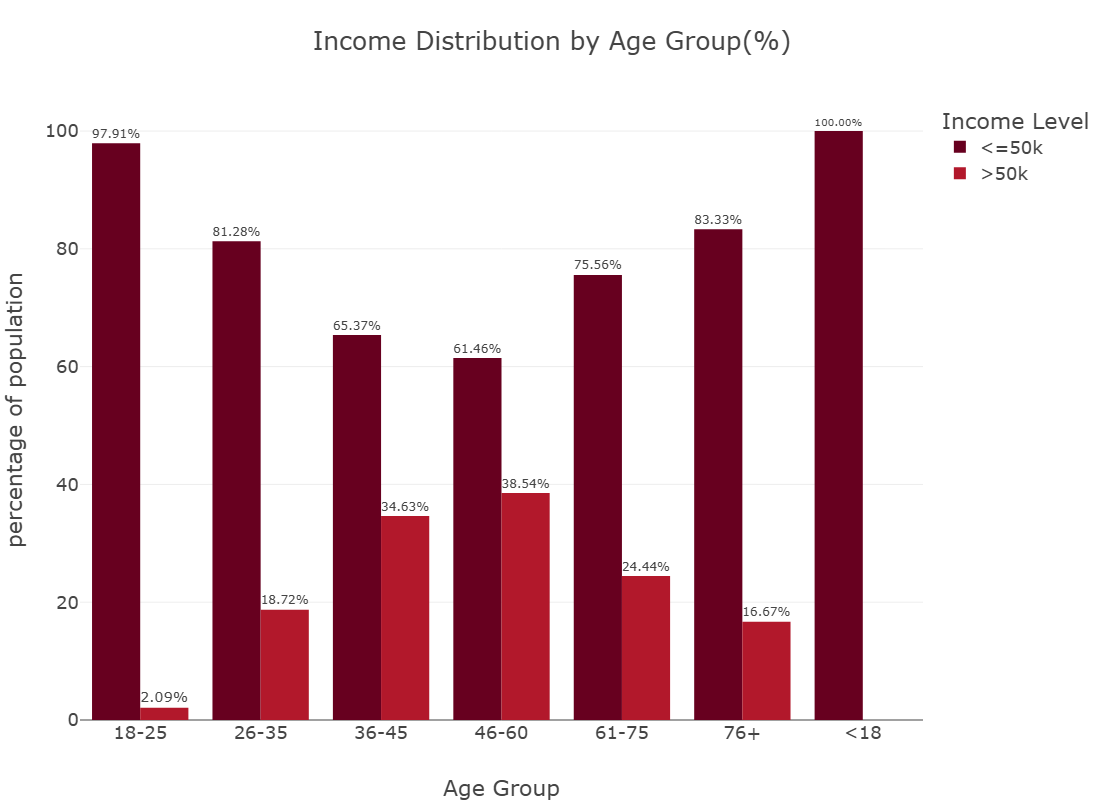

In [124]:
fig = px.bar(
    adult_df_income_age,
    x = "age_group",
    y = "percentage",
    color = "income",
    title ="Income Distribution by Age Group(%)",
    barmode="group",
    height=800,
    width=1200,
    color_discrete_sequence= px.colors.sequential.RdBu,
    text="percentage"
)
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")

fig.update_layout(template = "presentation",xaxis_title="Age Group",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )

fig.show()
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.html'))

In [26]:
# themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", 
#           "xgridoff", "ygridoff", "gridon", "none"]
# for theme in themes:
#     fig.update_layout(template=theme)
#     fig.show()

## Income by native country

In [28]:
adult_df_income_reg = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_reg

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22768
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [29]:
total_per_native_region = adult_df_income_reg.groupby("native_region")["total_income_distr"].transform("sum")
adult_df_income_reg["percentage"] = (adult_df_income_reg["total_income_distr"] / total_per_native_region) * 100
adult_df_income_reg


,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22768,75.847825
7,north america,>50k,7250,24.152175
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


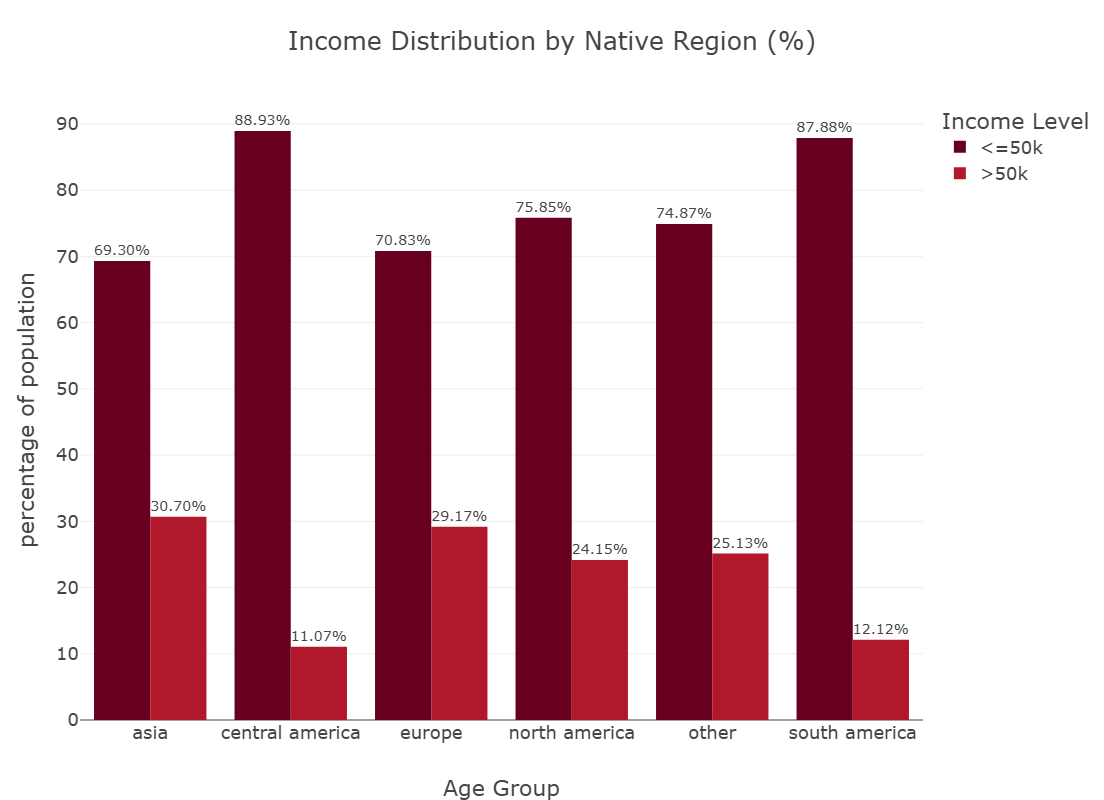

In [122]:
fig = px.bar(
    adult_df_income_reg,  
    x = "native_region",     
    y = "percentage",
    color = "income",
    title ="Income Distribution by Native Region (%)",
    barmode="group",
    height=800,
    width=1200,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text="percentage"
)
fig.update_traces(texttemplate="%{text:.2f}%",textposition= "outside")

fig.update_layout(template = "presentation",
                  xaxis_title="Age Group",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                paper_bgcolor = "rgba(0, 0, 0, 0)",plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )

fig.show()
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(result_dir, 'Income_distribution_by_nativeregion_bar_plot.html'))

## Income by race

In [32]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_race

,race,income,total_income_distr
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20659
9,white,>50k,7112


In [33]:
total_per_race = adult_df_income_race.groupby("race")["total_income_distr"].transform("sum")
adult_df_income_race["percentage"] = (adult_df_income_race["total_income_distr"] / total_per_race) * 100
adult_df_income_race

,race,income,total_income_distr,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


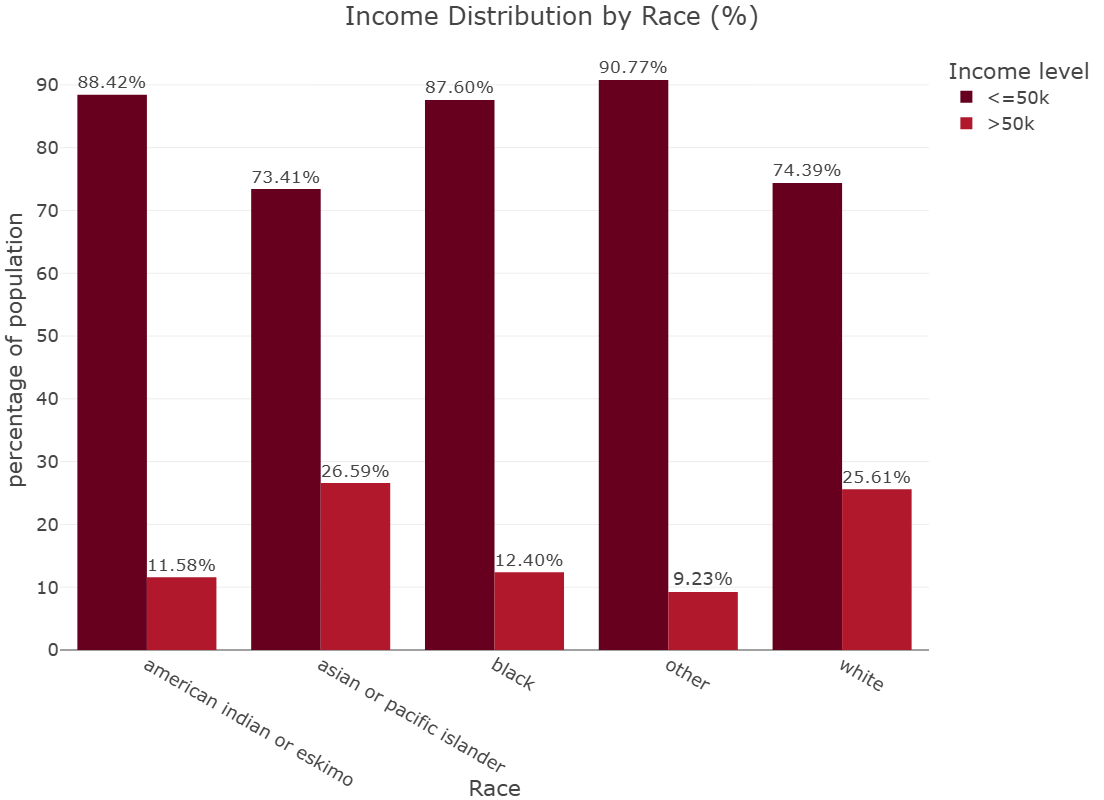

In [110]:
fig = px.bar(
    adult_df_income_race,  
    x="race",     
    y="percentage",
    color="income",
    title="Income Distribution by Race (%)",
    barmode="group",
    height=800,
    width=1200,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text="percentage"
)

fig.update_traces(texttemplate="%{text:.2f}%",textposition= "outside")

fig.update_layout(
    template="presentation",
    xaxis_title="Race",
    yaxis_title="percentage of population",
    legend_title = dict(text='Income level'),
    xaxis_title_standoff=50 ,
    margin=dict(l=60,r=50,t=50 ,b=150),
    paper_bgcolor = "rgba(0, 0, 0, 0)",
    plot_bgcolor = "rgba(0, 0, 0, 0)"
)
fig.show()
fig.write_image(os.path.join(result_dir, 'Income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Income_distribution_pie_chart.png'))
fig.write_html(os.path.join(result_dir, 'Income_distribution_pie_chart.html'))

## Income by education and occupation

In [35]:
adult_df_income_edu_occ = adult_df.groupby(["education_level","occupation_grouped","income"]).size().reset_index(name="total").sort_values("total", ascending=False)
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
29,secondary-school graduate,blue collar,<=50k,3976
56,tertiary,white collar,>50k,3545
55,tertiary,white collar,<=50k,3369
45,some college,white collar,<=50k,3003
36,secondary-school graduate,white collar,<=50k,2900
38,some college,blue collar,<=50k,1503
32,secondary-school graduate,service,<=50k,1444
20,secondary,blue collar,<=50k,1349
6,associate,white collar,<=50k,1015
41,some college,service,<=50k,902


In [36]:
adult_df_income_edu_occ["edu_occ"] = (adult_df_income_edu_occ["education_level"] + " | "
                                     + adult_df_income_edu_occ["occupation_grouped"])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
29,secondary-school graduate,blue collar,<=50k,3976,secondary-school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
36,secondary-school graduate,white collar,<=50k,2900,secondary-school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
32,secondary-school graduate,service,<=50k,1444,secondary-school graduate | service
20,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


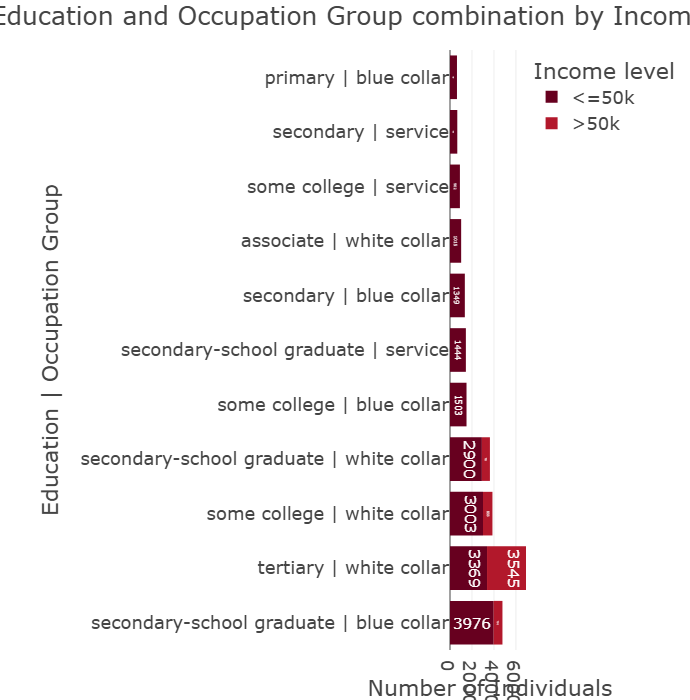

In [108]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x="total",     
    y="edu_occ",
    color="income",
    orientation="h",
    title="Top 15 Education and Occupation Group combination by Income Group",
    #barmode="group",
    height=700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text = "total"
)

fig.update_traces(textposition= "inside")

fig.update_layout(
    template="presentation",
    xaxis_title="Number of Individuals",
    yaxis_title="Education | Occupation Group",
    legend_title = dict(text='Income level'),
    margin=dict(l=450,r=50,t=50 ,b=50),
    paper_bgcolor = "rgba(0, 0, 0, 0)",
    plot_bgcolor = "rgba(0, 0, 0, 0)"
)

fig.show()
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_eduandocc.jpg'))
fig.write_image(os.path.join(result_dir, 'Income_distribution_by_eduandocc.png'))
fig.write_html(os.path.join(result_dir, 'Income_distribution_by_eduandocc.html'))